We discussed the basics of Artificial Neural Network (or Multi-Layer Perceptron) in the last two notebooks. Now you can implement a simple version of ANN by yourself, but there are already many packages online that you can use it with more flexible settings. In this notebook, we will give an example of using MLP from the awesome [scikit-learn](http://scikit-learn.org/stable/). You can also check their website about the introduction of the [ANN](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).   

We will work on the famous [Handwritten Digits Data Sets](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set), and classify the digits using MLP. Recognizing handwritten digits is vastly used everywhere these days, for example, when you deposit a check at ATM, an algorithm similar to what we will cover here to recognize the number you wrote. 

We will show the basic working flow of using the MLP classifier in sklearn, and hope you can use this as an initial start in your research. Let's start now!

In [1]:
# import all the needed module
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
plt.style.use('seaborn-poster')
%matplotlib inline

## Load and visualize data 

Let's load the [Handwritten Digits Data Set](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set) from sklearn. The data set contains images of handwritten digits: 10 classes where each class refers to a digit from 0 to 9. In sklearn, it includes a subset of the handwritten data for quick testing purposes, therefore, we will use this subset as an example. Load the data first:  

In [2]:
# load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


In [3]:
# let's look at how many classes we have
print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# let's look at one sample data, it is 64 features (8*8)
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

The data that we are interested in is made of 8x8 images of digits, and we will plot the first 64 samples below, and get a sense what we will work with. Each image shows the handwritten digit and the correct digit on the left bottom corner.   

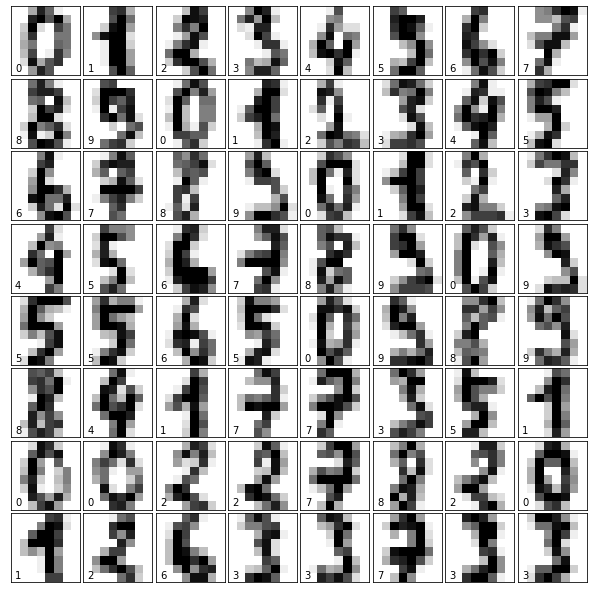

In [5]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

## Train an ANN classifier  

We will split the whole data into 80% training data and 20% test data. We then will build an ANN model using the default parameter setting, and train it using the training data. 

In [6]:
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)
print('Number of samples in training set: %d, number of samples in test set: %d'%(len(y_train), len(y_test)))

Number of samples in training set: 1437, number of samples in test set: 360


The next step is doing [pre-processing](http://scikit-learn.org/stable/modules/preprocessing.html) of the data. In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. Usually, the pre-processing can transform the data to the range of 0 to 1, or zero mean and unit variance, and so on. Here, we will use the StandardScaler in sklearn to scale the data to zero mean and unit variance. 

In [23]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The following code block is to train the MLP classifier. We will mostly use the default setting, and you can find more details information of the options [here](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). 

In [24]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 1000)

# Train the classifier with the training data
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 30, 30),
              max_iter=1000)

I will explain the options usually you need change or know briefly here:  
* activation - this is to define different activation functions.   
* alpha - this parameter controls the [regularization][1] which help avoiding overfitting.  
* solver - the option to choose different algorithm for weight optimization. 
* batch_size - size of minibatches for stochastic optimizers. This is the option that will decide how much samples will be used in [online learning](https://en.wikipedia.org/wiki/Online_machine_learning).   
* learning_rate - option to use different learning rate for weight updates. You can use constant learning rate, or changing the learning rate with progress.   
* max_iter - maximum number of iterations. This will decide when to stop the solver, either the solver converges (determined by 'tol') or this maximum number of iterations.  
* tol - tolerance for the optimization.  
* momentum - momentum for gradient descent update. This will try to avoid trap the local minimum. 

[1]: https://en.wikipedia.org/wiki/Regularization_(mathematics)

## Test ANN classifier and evaluate  

After we trained the ANN classifier, we will test the performance of the classifier using the test data. To evaluate the results, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

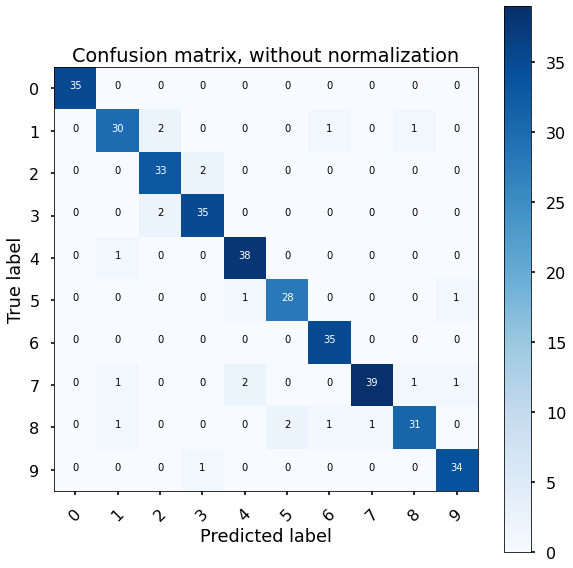

In [26]:
# predict results from the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

The x axis is the predicted digit from the MLP model, and the y axis is the true digit. The diagonal represents the correct results, we can see most of the digits we can estimate correctly. If we look at the first row, the off-diagonal number represents how many digits we estimate wrong for the digit 0, if there is 1 at the 6th column, this means that we classify one 0 digit to 5.   

## Visualize the test results  

Let's visualize the first 64 digits in the test data. The green or the red digits at the left bottom corner are our estimation from the MLP model. Green means we correctly classified the data, and red indicates the model did wrong. 

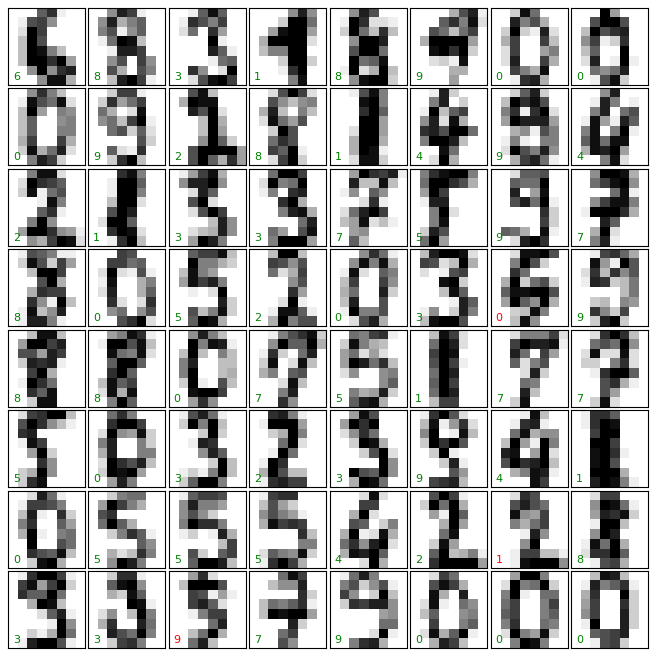

In [11]:
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')